#  Introduction to Python (session 3) <a class="tocSkip">
<br>

#### Content created by Francesca Pontin (please contact: F.L.Pontin@leeds.ac.uk) <a class="tocSkip">

# Exercise 1:  getting started with spatial data

As is coding custom we import the required packages at the beginning<br>
<font color='orchid'> <b>Import the packages below </font>

Should look similar to:
/opt/anaconda3/envs/geo_env/bin/python

In [1]:
#Import the required packages

import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import pyproj
import contextily as ctx
import seaborn as sns
import geoplot as gplt


We have imported a few new packages including 'geopandas'. Geopandas works like pandas but also handles spatial data. Geopandas was designed to allow people to easily handle and use spatial datasets in Python. <br>

Geopandas has some datasets built into the package. We are going to use these datasets to get started and make some maps.

<font color='orchid'> <b>Run the code below to explore which datasets are built in to the geopandas package </font>

In [2]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

Geopandas has three in built datasets. We are going to use 'naturalearth_cities' and 'naturalearth_lowres'. <br>
To use the datasets we need to read them in from where they are stored in the geopandas package file directory. <br>
We will use the print function to check we have got the correct file path.<br>
<font color= 'orchid'> <b>Run the code bellow to get the file paths for the datasets </font>

In [3]:
cities_path = gpd.datasets.get_path('naturalearth_cities')
countries_path = gpd.datasets.get_path('naturalearth_lowres')
print(cities_path)
print(countries_path)

/opt/anaconda3/lib/python3.7/site-packages/geopandas/datasets/naturalearth_cities/naturalearth_cities.shp
/opt/anaconda3/lib/python3.7/site-packages/geopandas/datasets/naturalearth_lowres/naturalearth_lowres.shp


## Shapefiles
Notice the file type of the 'naturalearth_cities' and 'naturalearth_lowres' is ".shp". This is a shapefile ["A shapefile is an Esri vector data storage format for storing the location, shape, and attributes of geographic features. It is stored as a set of related files and contains one feature class."](https://doc.arcgis.com/en/arcgis-online/reference/shapefiles.htm).

## Reading in spatial data
We need to read these shp files in, geopandas work the same way as pandas, but are also able to handle the spatial element of the dataset. Therefore the code we use is very similar. We use <code>geopandas.read_file(<font color =red>file_path</font>) </code> replacing <font color =red>"file_path"</font>, with the actual path to the shapefile you want to use.

<div class="alert alert-block alert-info">
<b>Note:</b> This is very similar to the <code>pd.read_csv() function</code>
</div>

<font color='orchid'> Run the code below to read the spatial data in </font>

In [4]:
# Read in the shape file data
cities = gpd.read_file(cities_path)
countries = gpd.read_file(countries_path)

### Data Exploration
Just as we have done before we are goign to explore the data by having a look at the dataframes and by visualising both the data sets.

In [5]:
# let's have a look at the cities geopandas dataframe 
cities.head()

name                   geometry
0  Vatican City  POINT (12.45339 41.90328)
1    San Marino  POINT (12.44177 43.93610)
2         Vaduz   POINT (9.51667 47.13372)
3    Luxembourg   POINT (6.13000 49.61166)
4       Palikir  POINT (158.14997 6.91664)

Note that the dataframe has two columns:
- 'name' naming the city
- 'geometry' listing the type of geometry, in this case POINT. And two numbers - the coordiantes of the point.

## Simple spatial data visualisation
### Point data

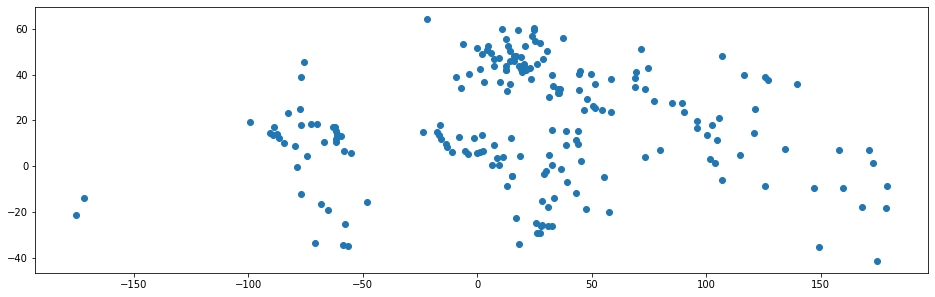

In [6]:
# Plot the cities data

# define the plot size and nummber of subplots (1 i.e. 1 plot)
f, ax = plt.subplots(1, figsize=(16, 8))
# plot the  cities, specifying the subplot axis
cities.plot(ax=ax)
# show the plot
plt.show()

Now we will do the same for the countries dataframe.

### Polygon data

In [7]:
# Explore the countries dataframe
countries.head()

pop_est      continent                      name iso_a3  gdp_md_est  \
0     920938        Oceania                      Fiji    FJI      8374.0   
1   53950935         Africa                  Tanzania    TZA    150600.0   
2     603253         Africa                 W. Sahara    ESH       906.5   
3   35623680  North America                    Canada    CAN   1674000.0   
4  326625791  North America  United States of America    USA  18560000.0   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

<b>Note</b> the geometry column this time is made up of POLYGON data, made up of many coordiante points. <br>
Let us have a closer look at the polygon geometry. We are going to look at the geometry of row 1.

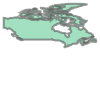

In [8]:
# Lets look at index 3 (for me it is Canada) of the geometry column
# Notice the shape is quite complex with lots of edges
countries.loc[3,'geometry']

In [9]:
# let us look at the list of coordiantes
print(countries.loc[3,'geometry'])
# Each point is a corner of the country

MULTIPOLYGON (((-122.84 49.00000000000011, -122.97421 49.00253777777778, -124.91024 49.98456, -125.62461 50.41656, -127.43561 50.83061, -127.99276 51.71583, -127.85032 52.32961, -129.12979 52.75538, -129.30523 53.56159, -130.51497 54.28757, -130.5361089527368 54.80275447679924, -130.53611 54.80278000000001, -129.98 55.285, -130.00778 55.91583000000008, -131.70781 56.55212, -132.73042 57.69289000000001, -133.35556 58.41028000000001, -134.27111 58.86111000000005, -134.9450000000001 59.2705600000001, -135.47583 59.78778000000001, -136.47972 59.46389000000005, -137.4525 58.905, -138.34089 59.56211, -139.039 60, -140.013 60.27682000000001, -140.99778 60.30639000000001, -140.9925 66.00003000000001, -140.986 69.712, -140.985987610376 69.71199839952635, -139.12052 69.47102, -137.54636 68.99002, -136.50358 68.89803999999999, -135.62576 69.31512000000001, -134.41464 69.62743, -132.92925 69.50534, -131.43136 69.94450999999999, -129.79471 70.19369, -129.10773 69.77927000000001, -128.36156 70.01286

### Now let's plot all the countries

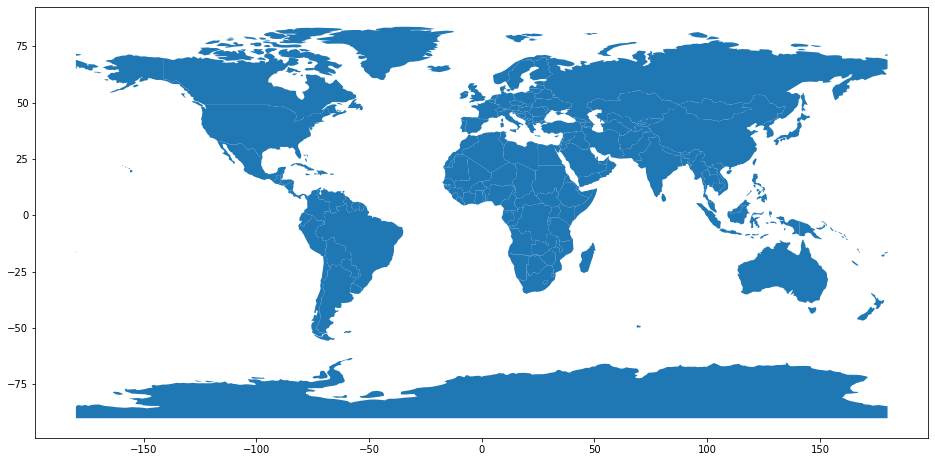

In [10]:
f,ax = plt.subplots(1, figsize=(16, 8))
countries.plot(ax=ax)
plt.show()

## Coordinate Reference Systems (CRS)
Before we map multiple layers we need to check they have the same Coordinate Reference System (CRS). Using the <code>.crs</code> function

In [11]:
cities.crs

{'init': 'epsg:4326'}

Look at what happens when we change the projection

In [12]:
# NAD83 Canadian Spatial Reference System: Large and medium scale topographic mapping and engineering survey.
countries_new_proj= countries.to_crs(epsg=2953)

# EPSG:3851 New Zealand Geodetic Datum 2000: Spatial referencing and conformal mapping on the NZ continental shelf.
countries_new_proj2= countries.to_crs(epsg=3851)

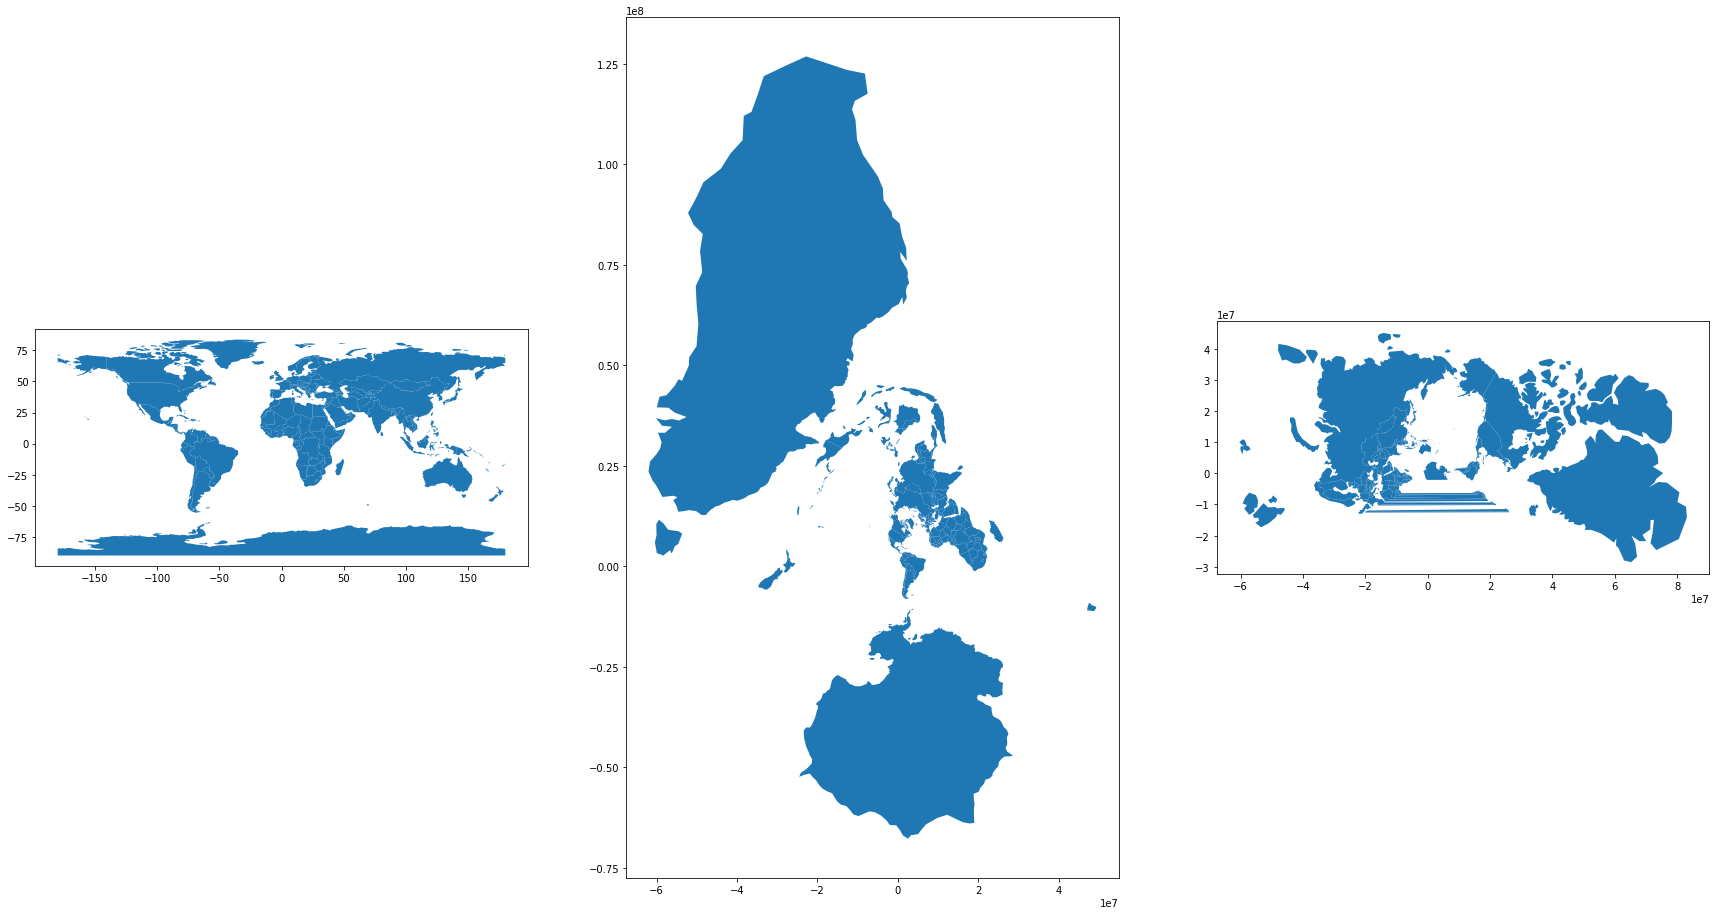

In [13]:
# plot the two diifferent projections
f, ax = plt.subplots(1,3, figsize=(30, 20))
countries.plot(ax=ax[0])
countries_new_proj.plot(ax=ax[1])
countries_new_proj2.plot(ax=ax[2])
plt.show()
# Note the different scales on the axis and orrientation of the countries

## Layering maps
Much like other mapping software it is possible to layer maps in Python. We will plot the cities on top of the countires dataset.

We need to check the CRS of both datasets is the same so we can accurately plot the layers on top of each other

In [14]:
# Check the CRS are the same
print(cities.crs, countries.crs)

{'init': 'epsg:4326'} {'init': 'epsg:4326'}


## Plot the cities and countries together

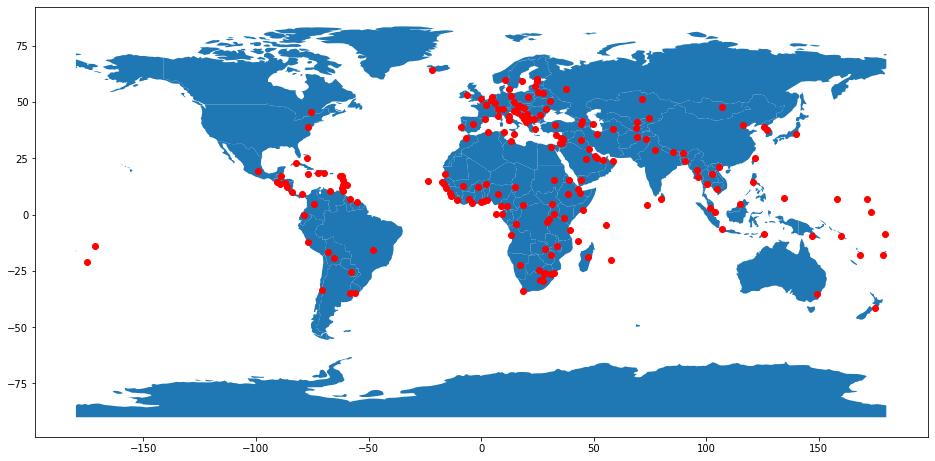

In [15]:
# plot one subplot (1 map), with dimensions 16 X 8
f, ax = plt.subplots(1, figsize=(16, 8))

# define the basemap plot it on the sublot axis
base = countries.plot(ax=ax)

# plot the cities on the basemap axis, colour the cities red
cities.plot(ax=base,color='red')

# shw the map
plt.show()

## Choropleth Mapping
Choropleth maps are maps where the polygons are coloured differenet shades or colours based on a value. E.g. Populaiton

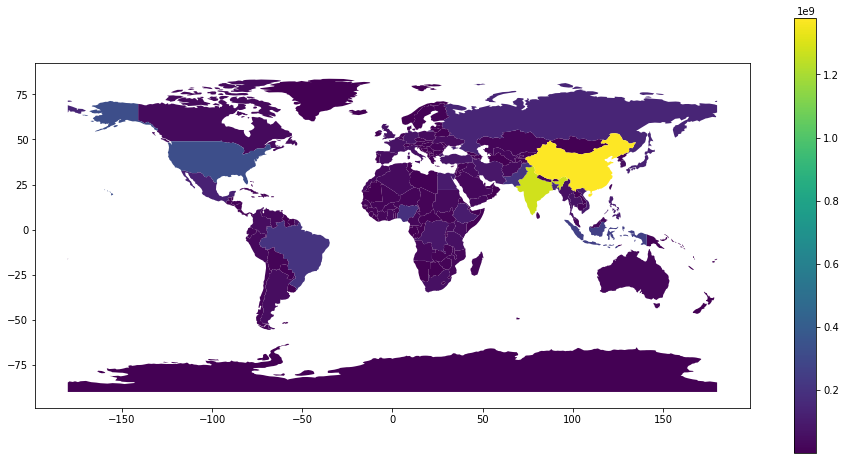

In [63]:
# Define plot size
f,ax = plt.subplots(1, figsize=(16,8))
# Plot the countries, specifying to plot the population estimate column 
# Add legend
countries.plot(ax=ax, column ='pop_est', legend=True)
plt.show()

We might instead want to plot the percentage of the world population in each country, to do this we can edit the scale of the colour bar. 

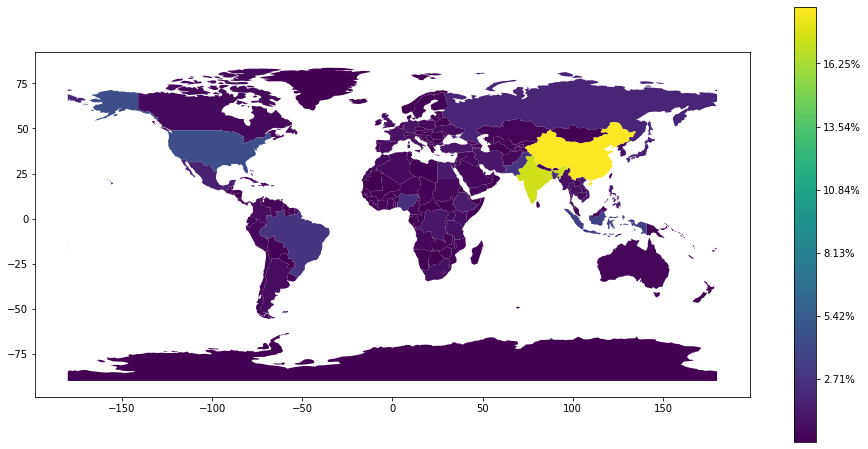

In [62]:
# Define plot size
f,ax = plt.subplots(1, figsize=(16,8))
# Plot the countries, specifying to plot the population estimate column 
# Add legend
countries.plot(ax=ax, column ='pop_est', legend=True)

colourbar = ax.get_figure().get_axes()[1]

# Get numerical values of yticks, and calcualte as percentageof the total world popualtion:
yticks = colourbar.get_yticks()/countries['pop_est'].sum()*100

# Apply some function f to each tick, where f can be your percentage conversion
colourbar.set_yticklabels(['{0:.2f}%'.format(ytick) for ytick in yticks])

plt.show()

<font color= 'orchid'> <b>Code your own choropleth map for 'gdp_mp_est'<b></font><br>


In [18]:
# code your choropleth map here!

### Plotting Categorical variables
It is possible to create choropleth maps with categorical variables. To do this we specify <code> categorical=True,</code> withn the <code>plot()</code> function.<br> If we treat the continent of the country as a categorical variable we can colour the countries based on the continent they are in.<br>

Note the legend of the map is now separate colours and not a continuous colour bar 

<font color ='orchid'> <b> Run the code below to plot a categorical chloropleth </font>

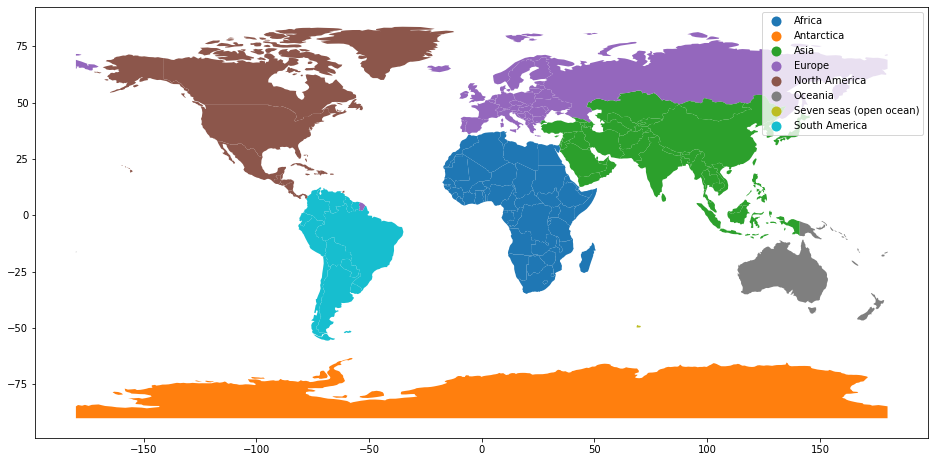

In [19]:
f,ax = plt.subplots(1, figsize=(16,8))
countries.plot(ax=ax, column ='continent', categorical=True, legend=True)
plt.show();

## Subsetting spatial data
We can also work with and plot just a subset of the spatial data. For example we might only be interested in Africa. In which case we can use the <code>.loc[]</code> fucntion to locate all rows (countries) where the continent is Africe. Just like we would normally do in a non-spatial pandas dataframe.<br>

<font color ='orchid'> <b>Run the code below </font>

In [20]:
# locate countries (rows) in Africa
africa= countries.loc[countries['continent']=='Africa']
# view the newly created Africa dataframe
africa

pop_est continent                  name iso_a3  gdp_md_est  \
1     53950935    Africa              Tanzania    TZA    150600.0   
2       603253    Africa             W. Sahara    ESH       906.5   
11    83301151    Africa       Dem. Rep. Congo    COD     66010.0   
12     7531386    Africa               Somalia    SOM      4719.0   
13    47615739    Africa                 Kenya    KEN    152700.0   
14    37345935    Africa                 Sudan    SDN    176300.0   
15    12075985    Africa                  Chad    TCD     30590.0   
25    54841552    Africa          South Africa    ZAF    739100.0   
26     1958042    Africa               Lesotho    LSO      6019.0   
48    13805084    Africa              Zimbabwe    ZWE     28330.0   
49     2214858    Africa              Botswana    BWA     35900.0   
50     2484780    Africa               Namibia    NAM     25990.0   
51    14668522    Africa               Senegal    SEN     39720.0   
52    17885245    Africa                  Mali    MLI     38090.0   
53     3758571    Africa            Mauritania    MRT     16710.0   
54    11038805    Africa                 Benin    BEN     24310.0   
55    19245344    Africa                 Niger    NER     20150.0   
56   190632261    Africa               Nigeria    NGA   1089000.0   
57    24994885    Africa              Cameroon    CMR     77240.0   
58     7965055    Africa                  Togo    TGO     11610.0   
59    27499924    Africa                 Ghana    GHA    120800.0   
60    24184810    Africa         Côte d'Ivoire    CIV     87120.0   
61    12413867    Africa                Guinea    GIN     16080.0   
62     1792338    Africa         Guinea-Bissau    GNB      2851.0   
63     4689021    Africa               Liberia    LBR      3881.0   
64     6163195    Africa          Sierra Leone    SLE     10640.0   
65    20107509    Africa          Burkina Faso    BFA     32990.0   
66     5625118    Africa  Central African Rep.    CAF      3206.0   
67     4954674    Africa                 Congo    COG     30270.0   
68     1772255    Africa                 Gabon    GAB     35980.0   
69      778358    Africa            Eq. Guinea    GNQ     31770.0   
70    15972000    Africa                Zambia    ZMB     65170.0   
71    19196246    Africa                Malawi    MWI     21200.0   
72    26573706    Africa            Mozambique    MOZ     35010.0   
73     1467152    Africa              eSwatini    SWZ     11060.0   
74    29310273    Africa                Angola    AGO    189000.0   
75    11466756    Africa               Burundi    BDI      7892.0   
78    25054161    Africa            Madagascar    MDG     36860.0   
80     2051363    Africa                Gambia    GMB      3387.0   
81    11403800    Africa               Tunisia    TUN    130800.0   
82    40969443    Africa               Algeria    DZA    609400.0   
154    5918919    Africa               Eritrea    ERI      9169.0   
162   33986655    Africa               Morocco    MAR    282800.0   
163   97041072    Africa                 Egypt    EGY   1105000.0   
164    6653210    Africa                 Libya    LBY     90890.0   
165  105350020    Africa              Ethiopia    ETH    174700.0   
166     865267    Africa              Djibouti    DJI      3345.0   
167    3500000    Africa            Somaliland    -99     12250.0   
168   39570125    Africa                Uganda    UGA     84930.0   
169   11901484    Africa                Rwanda    RWA     21970.0   
176   13026129    Africa              S. Sudan    SSD     20880.0   

                                              geometry  
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
11   POLYGON ((29.34000 -4.49998, 29.51999 -5.41998...  
12   POLYGON ((41.58513 -1.68325, 40.99300 -0.85829...  
13   POLYGON ((39.20222 -4.67677, 37.76690 -3.67712...  
14   POLYGON ((24.56737 8.22919, 23.80581 8.66632, ...  
15   POLYGON ((23.8

It is now possible to plot just Africa. We can also put maps side by side to compare them. Here we are going to plot population estimate for each country and the estimated GDP for each country.<br>

<font color = 'orchid'> <b> Run the code below,</b> make sure you understand what each line does (there is a lot going on)</font>

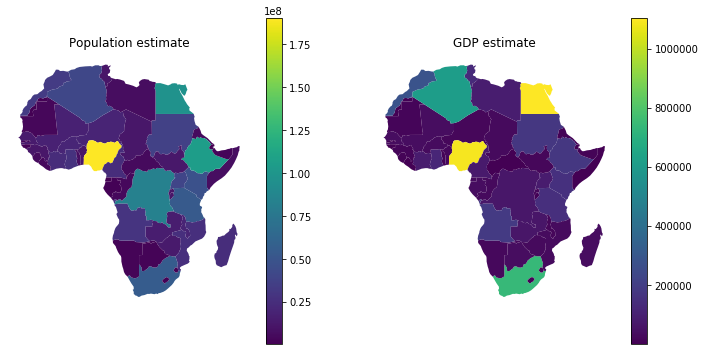

In [21]:
# create a figure with two subplots (maps) 
f,ax = plt.subplots(1,2, figsize=(12,6))

# plot population estimate in subplot 1
africa.plot(ax=ax[0], column ='pop_est', legend=True)

# plot gdp estimate in subplot 2
africa.plot(ax=ax[1], column ='gdp_md_est', legend=True)

# give subplot 1 an informative title
ax[0].set_title('Population estimate')

# give subplot 2 an informative title
ax[1].set_title('GDP estimate')

# make axis invisible for subplot 1
ax[0].set_axis_off()

# make axis invisible for subplot 1
ax[1].set_axis_off()

# show figure
plt.show()

## Subplots and axes

A quick note on the subplot and ax indexing. It can be a little tricky getting your head arround the indexing used when creating subplots.
To create mulitple subplots you use the code below, specifying firstly the number of rows then the number of columns. <br>
<code>.subplots([number of rows], [number of columns])</code>

When you are then specifyng each individual plot, you need to specify the axes of the plot, using the code <code> ax=ax[]</code>. The indexing for the axes starts at 0. I.e. the first row is 'row 0' and the first column, 'column 0'. This is illustrated below. 
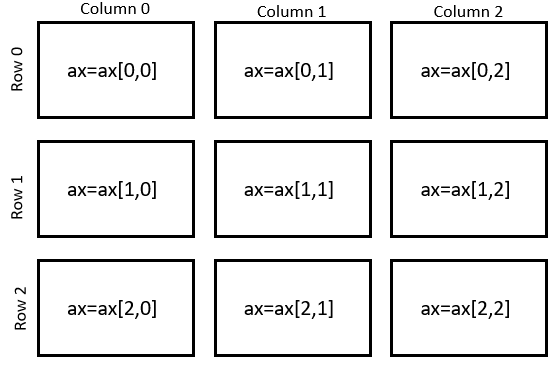

For a set of subplots with just one row you only need to specify the column in the <code>ax=ax[]</code> function. <br>
I.e. <code>ax=ax[column number]</code> <br>

I.e.<code> plt.subplot(1,2) <br>
dataframe.plot(ax=ax[0], ... 
dataframe.plot(ax=ax[1], ... </code>
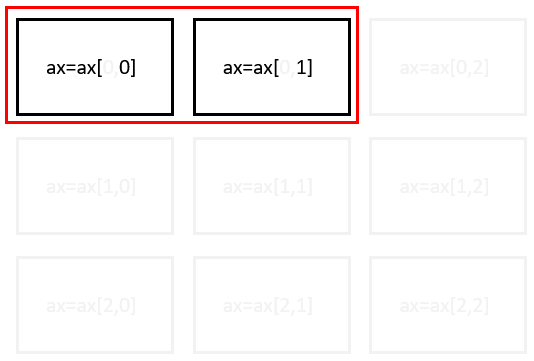 

Simialrly for a set of subplots with just one column you only need to specify the row in the <code>ax=ax[]</code> function. <br>
<code> plt.subplot(2,1) <br>
dataframe.plot(ax=ax[0], ... 
dataframe.plot(ax=ax[1], ... </code>
</code>
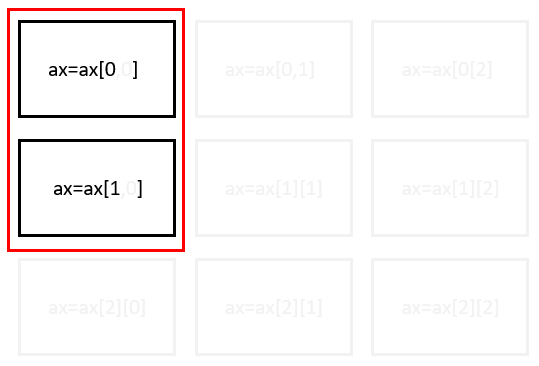

For a set of subplots with just multiple rows and columns you only need to specify both in the <code>ax=ax[,]</code> funciton.(row first then column)<br>
<code>plt.subplot(2,3)<br>
dataframe.plot(ax=ax[0,0], ... 
dataframe.plot(ax=ax[0,1], ...
dataframe.plot(ax=ax[0,2], ...
dataframe.plot(ax=ax[1,0], ...
dataframe.plot(ax=ax[1,1], ...
dataframe.plot(ax=ax[1,2], ...</code>
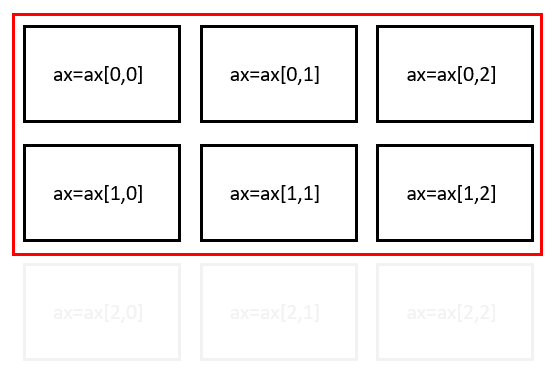

<div class="alert alert-block alert-warning">
    
## Extra task

### The data

In [22]:
usa_cities = gpd.read_file(gplt.datasets.get_path('usa_cities'))
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))

# remove cities in sates not in the contiguous USA (not connected directly to the mainland), for ease of plotting
continental_usa_cities = usa_cities.loc[(usa_cities['STATE'] !="HI") & (usa_cities['STATE'] !="AK" ) & (usa_cities['STATE'] !="PR")]


In [23]:
continental_usa_cities.head()

id  POP_2010  ELEV_IN_FT STATE                     geometry
0   53   40888.0      1611.0    ND  POINT (-101.29627 48.23251)
1  101   52838.0       830.0    ND   POINT (-97.03285 47.92526)
2  153   15427.0      1407.0    ND   POINT (-98.70844 46.91054)
3  177  105549.0       902.0    ND   POINT (-96.78980 46.87719)
4  192   17787.0      2411.0    ND  POINT (-102.78962 46.87918)

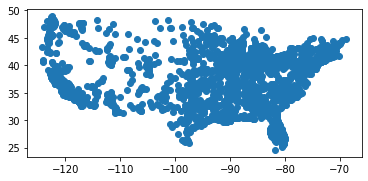

In [24]:
continental_usa_cities.plot()

In [25]:
contiguous_usa.head()

state adm1_code  population  \
0     Minnesota  USA-3514     5303925   
1       Montana  USA-3515      989415   
2  North Dakota  USA-3516      672591   
3         Idaho  USA-3518     1567582   
4    Washington  USA-3519     6724540   

                                            geometry  
0  POLYGON ((-89.59941 48.01027, -89.48888 48.013...  
1  POLYGON ((-111.19419 44.56116, -111.29155 44.7...  
2  POLYGON ((-96.60136 46.35136, -96.53891 46.199...  
3  POLYGON ((-111.04973 44.48816, -111.05025 42.0...  
4  POLYGON ((-116.99807 46.33017, -116.90653 46.1...

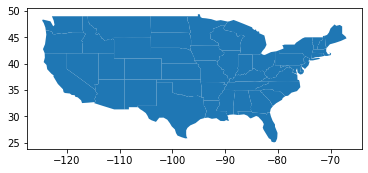

In [26]:
contiguous_usa.plot()

### Tasks:
- check the CRS of both geo data frames
- produce a layered map of cities and states
- Produce a choropleth map of 2010 popualation
- produce a choropleth map of elevation
- Colour city by state
- subset the data to plot a single state e.g. Washington

# Exercise 2: Mapping spatial data

## Geometric Manipulations 

### Buffers

A buffer in geographic information system (GIS) is a zone around a map feature measured in units of distance or time.

In Python we specify the buffer size: the radius of the buffer (in this case size is measured in degrees as the projection is epsg 4326).

E.g.:
<code> dataframe.crs ={'init': 'epsg:4326'} </code>

<code> dataframe.buffer(distance =10) </code> distance = 10 degrees.

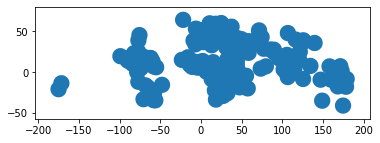

In [27]:
cities.buffer(distance=10).plot();

If we want to measure the buffer in meters we can change the projection to [EPSG 3857](https://epsg.io/3857) where the projection unit is meters (rather than degrees). 

Note: At the world scale this will result in errors in measurement due to the earth curvature. At a smaller scale, depending on where you are mapping other projections are more suitable e.g. [EPSG:4959](https://epsg.io/4959) is used in New Zealand

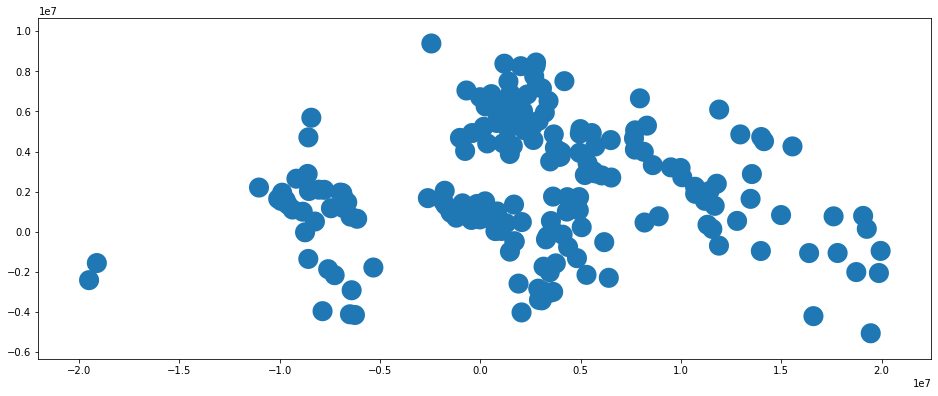

In [28]:
#Plot 500 km (500,0000 m) buffer arround cities

# plot one subplot (1 map), with dimensions 16 X 8
f, ax = plt.subplots(1, figsize=(16, 8))

cities.to_crs('epsg:3857').buffer(distance=500000).plot(ax=ax)

plt.show()

In order to keep information about the area begin buffered in the newly created buffer geo-data-frame it is useful to copy the original data you want to conduct the geometric maipulation on, and name it something else e.g. data_buffer.

Then replace the geometry column in the copied data with the calculated buffer geometry.

E.g. 
<code> dataframe_buffer = dataframe.copy() </code>

<code> dataframe_buffer['geometry'] = dataframe.buffer(distance)</code>

In [29]:
# copy the cities dataframe
cities_buffer = cities.copy()

# apply the function (replacing the geometry column with the buffer geometry)
cities_buffer['geometry'] = cities.buffer(10)

cities_buffer.head()

name                                           geometry
0  Vatican City  POLYGON ((22.45339 41.90328, 22.40523 40.92311...
1    San Marino  POLYGON ((22.44177 43.93610, 22.39362 42.95592...
2         Vaduz  POLYGON ((19.51667 47.13372, 19.46852 46.15355...
3    Luxembourg  POLYGON ((16.13000 49.61166, 16.08185 48.63149...
4       Palikir  POLYGON ((168.14997 6.91664, 168.10182 5.93647...

Note because we copied the cities data frame above the cities_buffer data frame contains the name of the city.

<font color = 'orchid'> <b> Try just running the code </b> <code>cities.buffer(10, resolution=10)</code>. </font> 
    
Note we get a geopandas array with the geometry data but not the corresponding city that is being buffered

In [30]:
# run the code
cities.buffer(10, resolution=10)

0      POLYGON ((22.45339 41.90328, 22.33027 40.33894...
1      POLYGON ((22.44177 43.93610, 22.31865 42.37175...
2      POLYGON ((19.51667 47.13372, 19.39355 45.56938...
3      POLYGON ((16.13000 49.61166, 16.00689 48.04732...
4      POLYGON ((168.14997 6.91664, 168.02686 5.35230...
                             ...                        
197    POLYGON ((41.24802 30.05191, 41.12491 28.48756...
198    POLYGON ((149.74946 35.68696, 149.62634 34.122...
199    POLYGON ((12.33139 48.86864, 12.20827 47.30429...
200    POLYGON ((-60.66899 -33.44807, -60.79210 -35.0...
201    POLYGON ((113.85387 1.29498, 113.73076 -0.2693...
Length: 202, dtype: geometry

We can add the cities_buffer layer to the map along with the countries and cities layers.

<font color = 'orchid'> <b> Run the code below, read the comments to understand what each line of code is doing  </font>

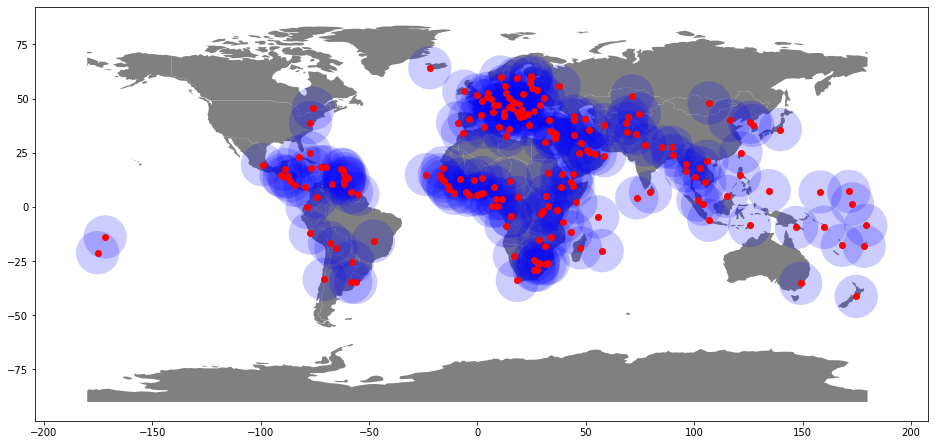

In [31]:
# plot one subplot (1 map), with dimensions 16 X 8
f, ax = plt.subplots(1, figsize=(16, 8))

# define the basemap plot it on the sublot axis
base = countries.plot(ax=ax, color='grey')

# plot the city buffers on the basemap axis, colour buffers blue
cities_buffer.plot(ax=base,color='blue', alpha=0.2)

# plot the cities on the basemap axis, colour the cities red
cities.plot(ax=base,color='red')

# shw the map
plt.show()

### Centroids

Put simply the centroid is the center most point of a polygon (there are different debated methods of calculating centroids, but unless you are using centroids for a specific purpose the method should not matter too much). 

#### Why calculate centroids?

Lots of geometric manipulations and analysis use centroids. For example you might use centroids to as a proxy to measure the distance between two polygons.


<font color = 'orchid'> <b>Use the code </b> <code> dataframe.centroid </code> <b>to find the country centroids (run the next 3 cells of code for the worked example below) </font>

In [32]:
# copy the countries dataframe
countries_centroid = countries.copy()

# calcualte the centorid 
# and replace the country geometry (polygon) with the centroid geometry (point)
countries_centroid['geometry'] = countries.centroid

# check - geometry should contain point data
countries_centroid.head()

pop_est      continent                      name iso_a3  gdp_md_est  \
0     920938        Oceania                      Fiji    FJI      8374.0   
1   53950935         Africa                  Tanzania    TZA    150600.0   
2     603253         Africa                 W. Sahara    ESH       906.5   
3   35623680  North America                    Canada    CAN   1674000.0   
4  326625791  North America  United States of America    USA  18560000.0   

                      geometry  
0  POINT (163.85316 -17.31631)  
1    POINT (34.75299 -6.25773)  
2   POINT (-12.13783 24.29117)  
3   POINT (-98.14238 61.46908)  
4  POINT (-112.59944 45.70563)

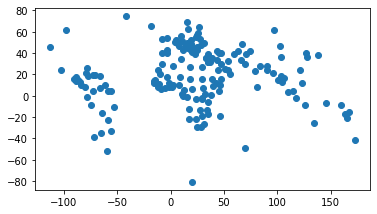

In [33]:
# plot to check it looks as expected
countries_centroid.plot();

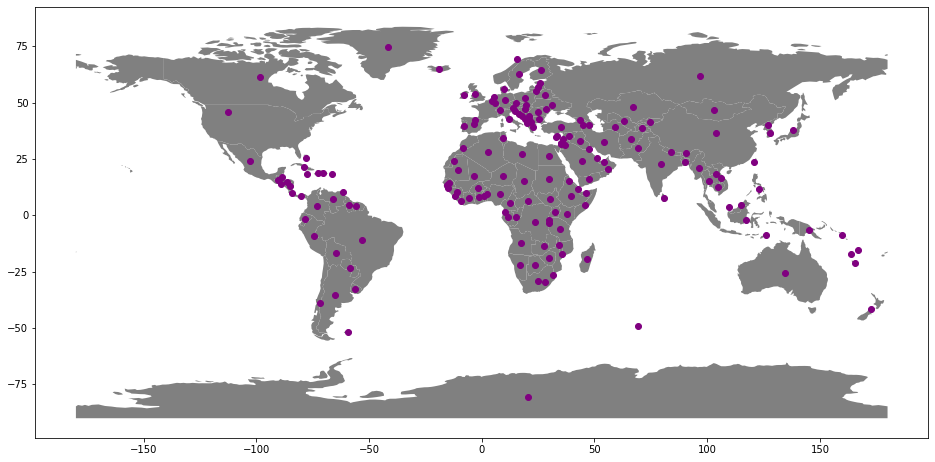

In [34]:
# plot one subplot (1 map), with dimensions 16 X 8
f, ax = plt.subplots(1, figsize=(16, 8))

# define the basemap plot it on the sublot axis
base = countries.plot(ax=ax, color='grey')

# plot the country centroids on the basemap axis, colour the centroids purple
countries_centroid.plot(ax=base,color='purple')

# show the map
plt.show()

We can also change marker size and colour of plotted points to reflect the data they represent (as we did with the chloropleth maps for polygon data). 

Note as population sizes are large (i.e. millions) I have assigned marker size to 'pop_est'/1,000,000, so the markers are plot-able. 

<font color = 'orchid'> <b>Run the code below, then try removing or reducing the size of <code>/1000000</code> and see what happens </font>

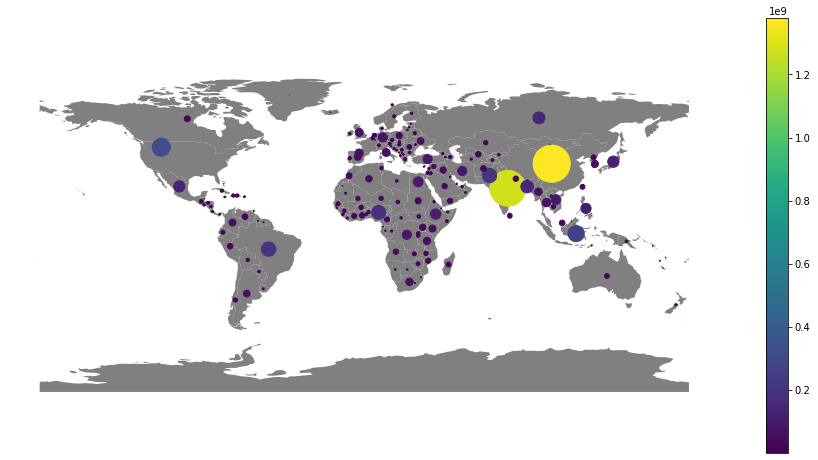

In [35]:
# plot one subplot (1 map), with dimensions 16 X 8
f, ax = plt.subplots(1, figsize=(16, 8))

# define the basemap plot it on the sublot axis
base = countries.plot(ax=ax, color='grey')

# plot the country centroids on the basemap axis, colour the centroids purple
countries_centroid.plot(ax=base,column='pop_est',markersize=countries['pop_est']/1000000, legend=True)

# make axis invisible
ax.set_axis_off()

# show the map
plt.show()

### Convex hull polygons

A convex hull is the smallest polygon that you can draw around a collection of points/a polygon.

<font color = 'orchid'> <b>Run the code below to create convex hull polygons (using the code </b><code> dataframe.convex_hull</code><b> around the countries in Africa </font>

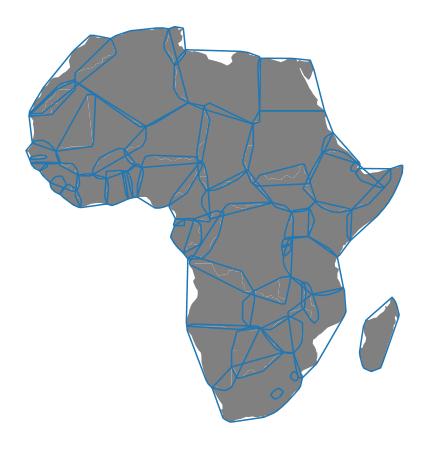

In [36]:
africa_convex_hull = africa.copy()

africa_convex_hull['geometry'] = africa.convex_hull

# plot one subplot (1 map), with dimensions 16 X 8
f, ax = plt.subplots(1, figsize=(16, 8))

# define the basemap plot it on the sublot axis
base = africa.plot(ax=ax, color='grey')

# plot the africa convex hull polygons
# .boundary alows us to just plot the polygon outline
africa_convex_hull.boundary.plot(ax=base)

# make axis invisible
ax.set_axis_off()

# show the map
plt.show()

<div class="alert alert-block alert-warning">

### Coding task 
Try: 
    - Buffering the countries centroids 
    - Buffering the Africa convex hull polygons 
    - Getting the centroid of the africa convex hull polygons
    - Getting the convex hull polygons of all the countries (note this might look a bit messy)
    


## Spatially aggregating data
Often our data will not be at the same spatial scale so we may need to aggregate areas of data together to get them to the same spatial scale. Or we may only be interested in larger spatial trends. Therefore we need to convert our smaller area data to larger area data. In geopandas we can easily so this using the <code>dissolve</code> function. 
In this example we are going to aggregate countries up to continent level. <br>
Think of dissolve as removing all the internal country boarders within the continent to leave just the continent outline.<br>
The data for the continent also gets aggregated e.g. estimated population and GDP. <br>
<font color='orchid'> <b> Run the code below </font>

In [37]:
# specify which columns from the countries dataframe we are going to aggreagate,
# use the continent column to inform the dissolve
continents = countries[['continent', 'pop_est', 'geometry','gdp_md_est']].dissolve(by='continent', aggfunc='mean').reset_index()

# view the new continents dataframe
continents

continent                                           geometry  \
0                   Africa  MULTIPOLYGON (((32.830 -26.742, 32.580 -27.470...   
1               Antarctica  MULTIPOLYGON (((-163.713 -78.596, -163.713 -78...   
2                     Asia  MULTIPOLYGON (((120.295 -10.259, 118.968 -9.55...   
3                   Europe  MULTIPOLYGON (((-51.658 4.156, -52.249 3.241, ...   
4            North America  MULTIPOLYGON (((-61.680 10.760, -61.105 10.890...   
5                  Oceania  MULTIPOLYGON (((169.668 -43.555, 170.525 -43.0...   
6  Seven seas (open ocean)  POLYGON ((68.935 -48.625, 69.580 -48.940, 70.5...   
7            South America  MULTIPOLYGON (((-66.960 -54.897, -67.291 -55.3...   

        pop_est    gdp_md_est  
0  2.390542e+07  1.181430e+05  
1  4.050000e+03  8.100000e+02  
2  9.338606e+07  1.179460e+06  
3  1.913842e+07  6.483302e+05  
4  3.183567e+07  1.305841e+06  
5  5.254692e+06  2.018407e+05  
6  1.400000e+02  1.600000e+01  
7  3.219544e+07  4.905455e+05

Think carefully about how you want to aggregate the columns, we can assign an aggfunction to each column. For each column we specify which function we want to apply to the aggreagated rows.<br>
The <code>{}</code> indicate a dictionary object where a set of objects (keys) are mapped to another set of objects (values)
i.e. the column is mapped to the required aggregation method: <code>, aggfunc={'pop_est':'sum','gdp_md_est':'mean'})</code>



In [38]:
continents = countries[['continent', 'pop_est', 'geometry','gdp_md_est']].dissolve(by='continent', aggfunc={'pop_est':'sum','gdp_md_est':'mean'}).reset_index()

# view the new continents dataframe
continents

continent                                           geometry  \
0                   Africa  MULTIPOLYGON (((32.830 -26.742, 32.580 -27.470...   
1               Antarctica  MULTIPOLYGON (((-163.713 -78.596, -163.713 -78...   
2                     Asia  MULTIPOLYGON (((120.295 -10.259, 118.968 -9.55...   
3                   Europe  MULTIPOLYGON (((-51.658 4.156, -52.249 3.241, ...   
4            North America  MULTIPOLYGON (((-61.680 10.760, -61.105 10.890...   
5                  Oceania  MULTIPOLYGON (((169.668 -43.555, 170.525 -43.0...   
6  Seven seas (open ocean)  POLYGON ((68.935 -48.625, 69.580 -48.940, 70.5...   
7            South America  MULTIPOLYGON (((-66.960 -54.897, -67.291 -55.3...   

      pop_est    gdp_md_est  
0  1219176238  1.181430e+05  
1        4050  8.100000e+02  
2  4389144868  1.179460e+06  
3   746398461  6.483302e+05  
4   573042112  1.305841e+06  
5    36782844  2.018407e+05  
6         140  1.600000e+01  
7   418540749  4.905455e+05

To solve this we can use <code>.agg({})</code> function to apply ["one or more operations over the specified axis"](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html).
<br> For each column we specify which function we want to apply to the aggreagated rows.<br>
The <code>{}</code> indicate a dictionary object where a set of objects (keys) are mapped to another set of objects (values)
i.e. the column is mapped to the required aggregation method.

<font color='orchid'> Run the code below and check you understand what it is doing </font>


Think carefully about how you want to aggregate the columns, we can assign an aggfunction to each column

E.g.
<code>, aggfunc={'gdp_md_est':'sum','pop_est':'mean'})</code>

There is no quick way to assign multiple columns the same function so with a large dataset you might want to consider which columns you include in the aggregated spatial data frame. 


In [39]:
africa_cont = gpd.GeoDataFrame(continents.loc[continents['continent']=='Africa'])
africa_cont

continent                                           geometry     pop_est  \
0    Africa  MULTIPOLYGON (((32.83012 -26.74219, 32.58026 -...  1219176238   

     gdp_md_est  
0  118143.04902

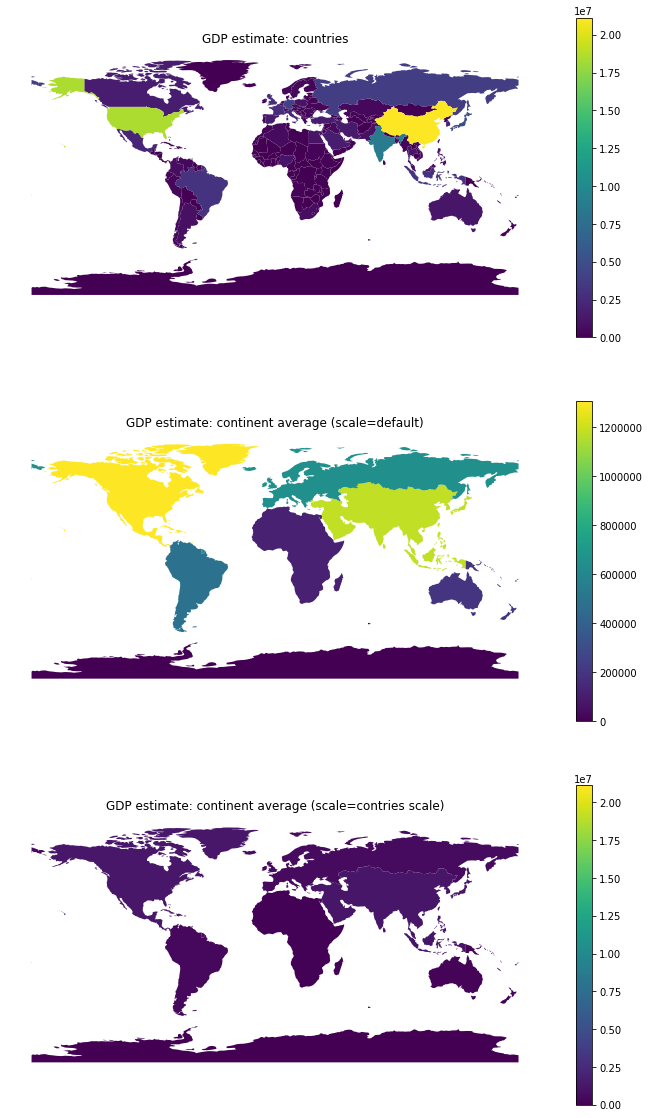

In [40]:
# create a figure with two subplots (maps) 
f,ax = plt.subplots(3,1, figsize=(12,20),sharex=True, sharey=True)

# plot countries mid year GDP estimate
countries.plot(ax=ax[0], column ='gdp_md_est', vmin=0,vmax=countries['gdp_md_est'].max() ,legend=True)

# plot countinent average mid year GDP estimate, default legend scale
continents.plot(ax=ax[1], column ='gdp_md_est', vmin=0,legend=True)

# plot countinent average mid year GDP estimate: countries legend scale 
continents.plot(ax=ax[2], column ='gdp_md_est', vmin=0,vmax=countries['gdp_md_est'].max() ,legend=True)

#patch_col = ax[0].collections[0]
#cb = f.colorbar(patch_col, ax=ax, shrink=0.5)

# make axis invisible for subplots
ax[0].set_axis_off()
ax[1].set_axis_off()
ax[2].set_axis_off()

# give subplot 1 an informative title
ax[0].set_title('GDP estimate: countries')

# give subplot 2 an informative title
ax[1].set_title('GDP estimate: continent average (scale=default)')

# give subplot 2 an informative title
ax[2].set_title('GDP estimate: continent average (scale=contries scale)')

# show figure
plt.show()

<font color= 'orchid'><b>Run the code below to plot a choropleth map of popualtion estimates for the continents</font>

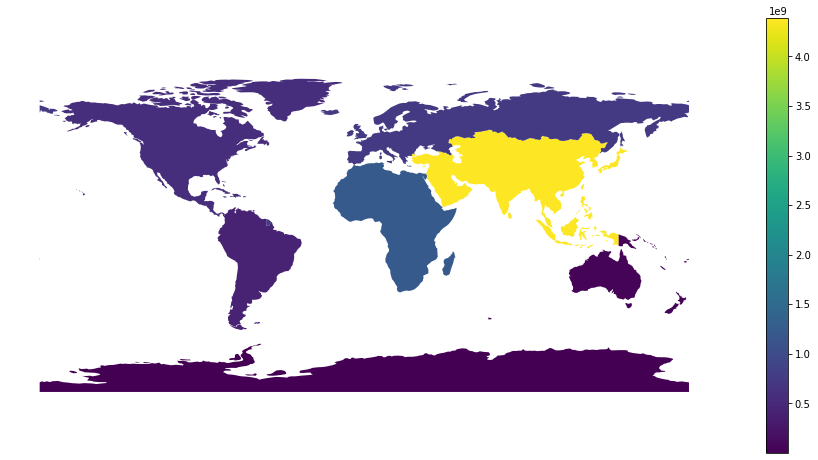

In [41]:
f,ax = plt.subplots(1, figsize=(16,8))
continents.plot(column='pop_est',legend=True, ax=ax)
# remove axis
ax.set_axis_off()
plt.show();

<font color='orchid'> <b>Try plotting continents by 'gdp_md_est' </font> <br>


In [42]:
#  plot here!

## Joining a non-spatial dataset to a spatial dataset

We are going to read in some data about forest coverage of differenet countires and join it to the countires dataframe

<font color ='orchid'><b> Run the code below to read in a csv of country forest coverage data </font>

In [43]:
# read in csv data using pandas
forest = pd.read_csv('country_forest.csv')
# have a quick look at the dataframe
forest.head()

country  forest_area_km2  per_forest
0         Russia          8149300      0.4940
1         Canada          4916438      0.4924
2         Brazil          4776980      0.5610
3  United States          3100950      0.3384
4          China          2083210      0.2183

The 'country' column in the forest dataframe matches that of the 'name' column in the countries dataframe. As they are formatted in exaclty the same way and each row is unique the country name is a unqiue identifier common to both dataframes. Therefore we will use this column to join our datasets. <br>
The code we will use is <code>pd.merge()</code>. We need to specify a few parameteres within the function:<br>

- Firstly we specify which dataframes we want to join (in the order we want to join them).<br>
<code> pd.merge(countries, forest... </code> <br>


- Secondly we need to specify the column in each dataframe, countries is on the left so we specify left_on='name': as we are using the 'name' column from the countires dataframe. And the forest dataframe is on the right so we specify right_on='country' as we are using the 'country' column.<br>
<code> pd.merge(countries, forest, left_on='name', right_on='country' ... </code> <br>


- Finally we need to specify how the tables are joined. This is based on [SQL join fomats](http://www.complexsql.com/sql-joins-2/). In this case we are using a left join (we keep all the data in the left dataframe and just add the columns form the right dataframe on the end). 
<code> pd.merge(countries, forest, left_on='name', right_on='country', how='left') </code> <br>

In [44]:
country_forest  = pd.merge(countries, forest,  left_on='name', right_on='country', how='left')
country_forest.head()

pop_est      continent                      name iso_a3  gdp_md_est  \
0     920938        Oceania                      Fiji    FJI      8374.0   
1   53950935         Africa                  Tanzania    TZA    150600.0   
2     603253         Africa                 W. Sahara    ESH       906.5   
3   35623680  North America                    Canada    CAN   1674000.0   
4  326625791  North America  United States of America    USA  18560000.0   

                                            geometry   country  \
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...      Fiji   
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  Tanzania   
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...       NaN   
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...    Canada   
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...       NaN   

   forest_area_km2  per_forest  
0          10000.0      0.5472  
1         352570.0      0.3722  
2              NaN         NaN  
3        4916438.0      0.4924  
4              NaN         NaN

Now we will visualise our newly joined data by plotting the percentage forest in each country

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


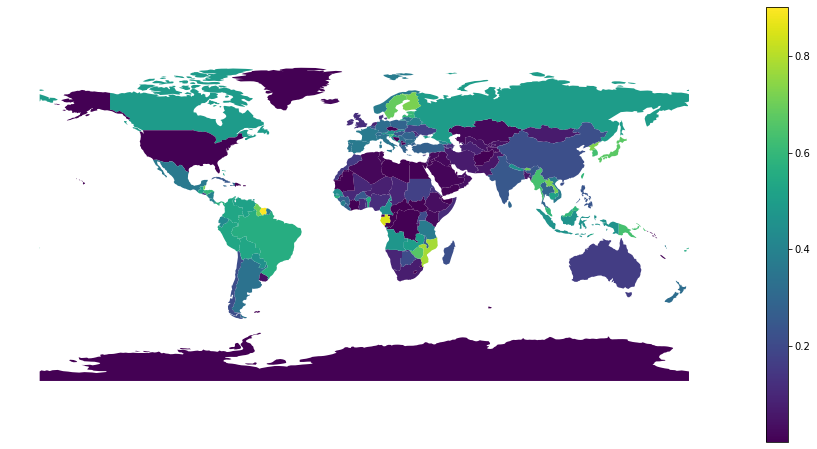

In [45]:
f,ax = plt.subplots(1, figsize=(16,8))
country_forest.plot(column='per_forest',legend=True,ax=ax)
# remove axis
ax.set_axis_off()
plt.show();

Because thereis such a large variaiton in percentage tree cover the above map with a continuous scale doesn't tell us much. To make a more informative plot we can use <code> scheme = ' '</code> 
And use <code> ['equal_interval', 'quantiles', 'fisher_jenks', 'fisher_jenks_sampled']</code> to define how the choropleth map is scaled.

/opt/anaconda3/lib/python3.7/site-packages/mapclassify/classifiers.py:419: RuntimeWarning: invalid value encountered in greater
  binIds += (x > l) * (x <= r) * k
/opt/anaconda3/lib/python3.7/site-packages/mapclassify/classifiers.py:419: RuntimeWarning: invalid value encountered in less_equal
  binIds += (x > l) * (x <= r) * k


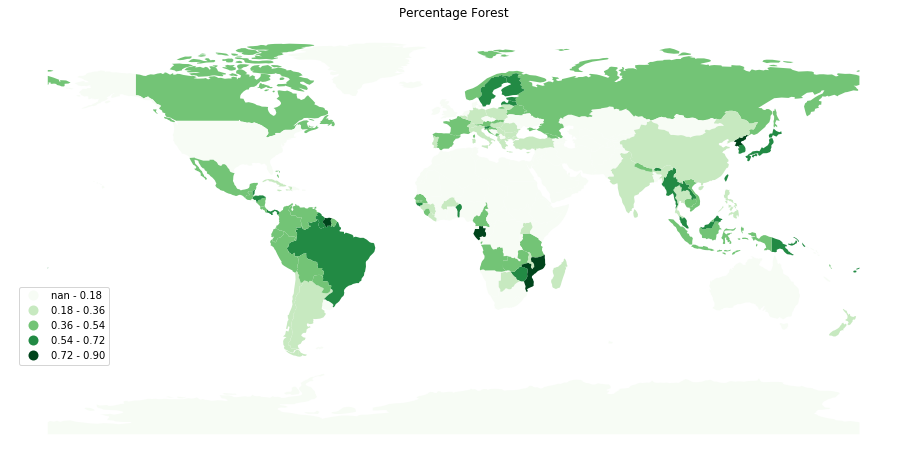

In [46]:
f,ax = plt.subplots(1, figsize=(16,8))
country_forest.plot(column='per_forest',legend=True,cmap='Greens',scheme='equal_interval', ax=ax)
# remove axis
ax.set_axis_off()
# position axis
ax.get_legend().set_bbox_to_anchor((.12, .4))
ax.set_title('Percentage Forest')
plt.show();

<font color='orchid'><b> Write your own code to map 'forest_area_km2'</font> <br>


In [47]:
# plot here!


## Spatially Joining Data

It is also possible to join data based on their spatial relationship to each other using <code>.sjoin()</code>
For example we ight want to know the country each city is in.


Like with <code>pd.merge()</code> there are parameters we need to specify when using <code>gpd.sjoin()</code>

- Again firstly we specify which dataframes we want to join (in the order we want to join them).<br>
<code>gpd.sjoin(cities, countries, ... </code> <br>


- Secondly we need to specify how the tables are joined. (Again based on [SQL join fomats](http://www.complexsql.com/sql-joins-2/)). In this case we are using an inner join
<code> gpd.sjoin(cities, countries, how="inner",... </code> <br>

- Finally we need to specify the tyep of spatial join using 'op'. From the [Geopandas documentation](http://geopandas.org/mergingdata.html) <br>
<i>The `op argument specifies how geopandas decides whether or not to join the attributes of one object to another. There are three different join options as follows:
    - <b>intersects:</b> The attributes will be joined if the boundary and interior of the object intersect in any way with the boundary and/or interior of the other object.
    - <b>within:</b> The attributes will be joined if the object’s boundary and interior intersect only with the interior of the other object (not its boundary or exterior).
    - <b>contains:</b> The attributes will be joined if the object’s interior contains the boundary and interior of the other object and their boundaries do not touch at all. </i> <br>
    
<font color = 'orchid'><b> Run the code below to spatially join the data </font>

In [48]:
cities_with_country = gpd.sjoin(cities, countries, how="inner", op='intersects')
cities_with_country.head()

name_left                   geometry  index_right   pop_est continent  \
0    Vatican City  POINT (12.45339 41.90328)          141  62137802    Europe   
1      San Marino  POINT (12.44177 43.93610)          141  62137802    Europe   
192          Rome  POINT (12.48131 41.89790)          141  62137802    Europe   
2           Vaduz   POINT (9.51667 47.13372)          114   8754413    Europe   
184        Vienna  POINT (16.36469 48.20196)          114   8754413    Europe   

    name_right iso_a3  gdp_md_est  
0        Italy    ITA   2221000.0  
1        Italy    ITA   2221000.0  
192      Italy    ITA   2221000.0  
2      Austria    AUT    416600.0  
184    Austria    AUT    416600.0

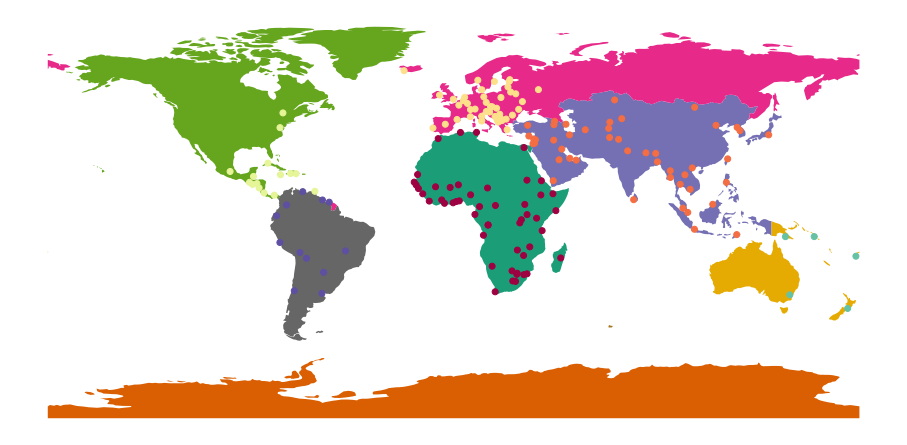

In [49]:
# let us plot the cities now coloured by the continent (a column initally from the cities dataframe)
f,ax = plt.subplots(1, figsize=(16,8))

# map the countries (basemap)
base = continents.plot(ax=ax, cmap='Dark2')
# plot the cities and colour them based on continent
cities_with_country.plot(column='continent',ax=base, cmap='Spectral')
# remove axis
ax.set_axis_off()
plt.show()

Try doing the same for US cities and states:

In [50]:
# have a go here

## Overlay - creating spatial layers from the intersections, unions, and differences between map
I have included this for reference with a worked example, to show you how we can look at where spatial data overlaps. Full description an a list of the overlay operations can be found here: https://geopandas.org/set_operations.html
Have a read and explore the data

In [51]:
countries_in_buff =gpd.overlay(cities_buffer , countries, how='intersection')
countries_in_buff

name_1   pop_est continent   name_2 iso_a3  gdp_md_est  \
0     Vatican City   6653210    Africa    Libya    LBY     90890.0   
1        Podgorica   6653210    Africa    Libya    LBY     90890.0   
2         Pristina   6653210    Africa    Libya    LBY     90890.0   
3           Skopje   6653210    Africa    Libya    LBY     90890.0   
4            Tunis   6653210    Africa    Libya    LBY     90890.0   
...            ...       ...       ...      ...    ...         ...   
2039        Dublin   5011102    Europe  Ireland    IRL    322000.0   
2040        London   5011102    Europe  Ireland    IRL    322000.0   
2041         Paris   5011102    Europe  Ireland    IRL    322000.0   
2042        Manila  23508428      Asia   Taiwan    TWN   1127000.0   
2043        Taipei  23508428      Asia   Taiwan    TWN   1127000.0   

                                               geometry  
0     POLYGON ((15.17565 32.28865, 14.40429 32.09543...  
1     POLYGON ((21.80055 32.80424, 21.21721 32.65812...  
2     POLYGON ((22.27000 32.73323, 22.14616 32.71486...  
3     POLYGON ((23.36971 32.18998, 22.41363 32.04816...  
4     POLYGON ((18.10629 30.72381, 17.90978 30.45885...  
...                                                 ...  
2039  POLYGON ((-6.19788 53.86757, -6.03299 53.15316...  
2040  POLYGON ((-6.19788 53.86757, -6.03299 53.15316...  
2041  POLYGON ((-7.10032 52.15632, -6.90741 52.69547...  
2042  POLYGON ((120.75448 24.59501, 120.98027 24.606...  
2043  POLYGON ((121.77782 24.39427, 121.17563 22.790...  

[2044 rows x 7 columns]

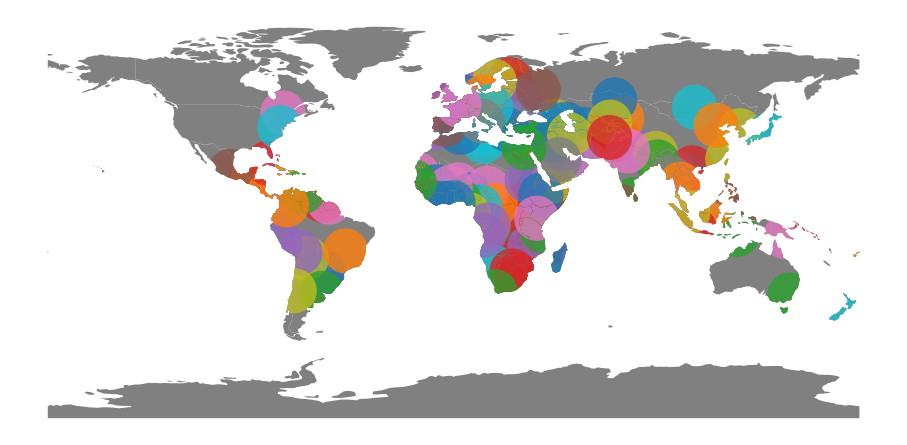

In [52]:
f,ax = plt.subplots(1, figsize=(16,8))

base = countries.plot(ax=ax,color='grey')
countries_in_buff.plot(ax=base, column='name_1',alpha=0.8)
# remove axis
ax.set_axis_off()
plt.show();

## Some other interesting maps

### Introducing geoplot: geospatial data visualization

package<i>'Geoplot is a high-level Python geospatial plotting library. It’s an extension to cartopy and matplotlib which makes mapping easy: like seaborn for geospatial. It comes with the following features:'</i>

Geoplot has many of the same functions that we have already used in visualising our maps, but also has some additional mapping features. Learn more here: https://residentmario.github.io/geoplot/plot_references/plot_reference.html

### Kernel density map

Much like the kernel density plots we produced in day 1 this produces a kernel density estimate of spatial point data. 

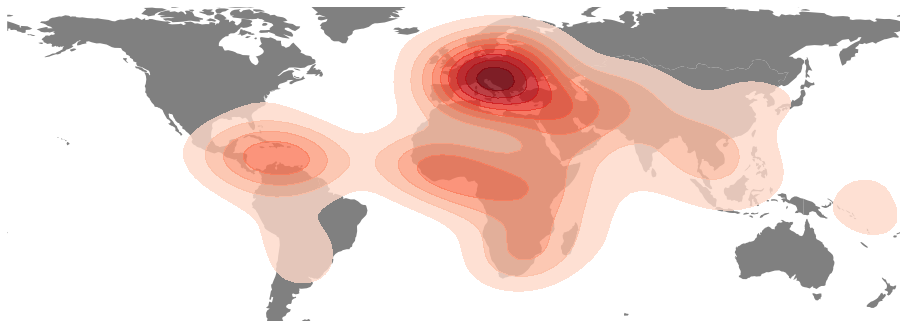

In [53]:
f,ax = plt.subplots(1, figsize=(16,8))

# map the countries (basemap)
base = continents.plot(ax=ax, color='grey')

# map the kernel density estimate of world cities
gplt.kdeplot(cities, cmap="Reds", shade=True,ax=base, alpha=0.8)

# remove axis
ax.set_axis_off()

plt.show()

### Cartogram

A cartogram distorts (grows or shrinks) polygons on a map according to the magnitude of some input data. E.g. we could resize countries based on their population size

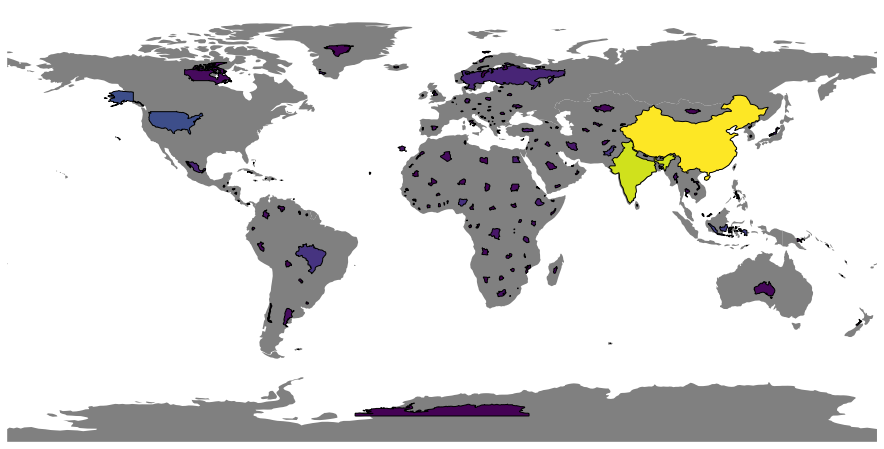

In [54]:
f,ax = plt.subplots(1, figsize=(16,8))

# map the countries (basemap)for refernce
base = continents.plot(ax=ax, color='grey')

# map the countries resized by popualtion estimate
gplt.cartogram(countries, scale='pop_est', hue='pop_est',ax=ax)

# remove axis
ax.set_axis_off()

plt.show()

<font color ='orchid'><b> Write your own code to resize countries by GDP </font>

In [55]:
# Write your own code to resize countries by GDP


<font color ='orchid'><b> Write your own code to resize countries by forest area per km2 </font>

In [56]:
# Write your own code to resize countries by forest_area_km2


### Adding base maps
Base maps provide the reader with context for a map. At a smaller scale than we are currently using the basemap may show road networks or point of interest. 

We are going to use contextily to add the background map to the geographic data using the <code>.basemap()</code> function. 

#### Aligning the CRS
But first we need to convert the CRS of the data we want to plot to the Web Mercator projection (epsg=3857). So the base maps and geographic data we are plotting align. 

Unless the data file I want to plot is particularly big I tend to save the data with the Web Mercator projection as a new geodataframe to avoid confusion.

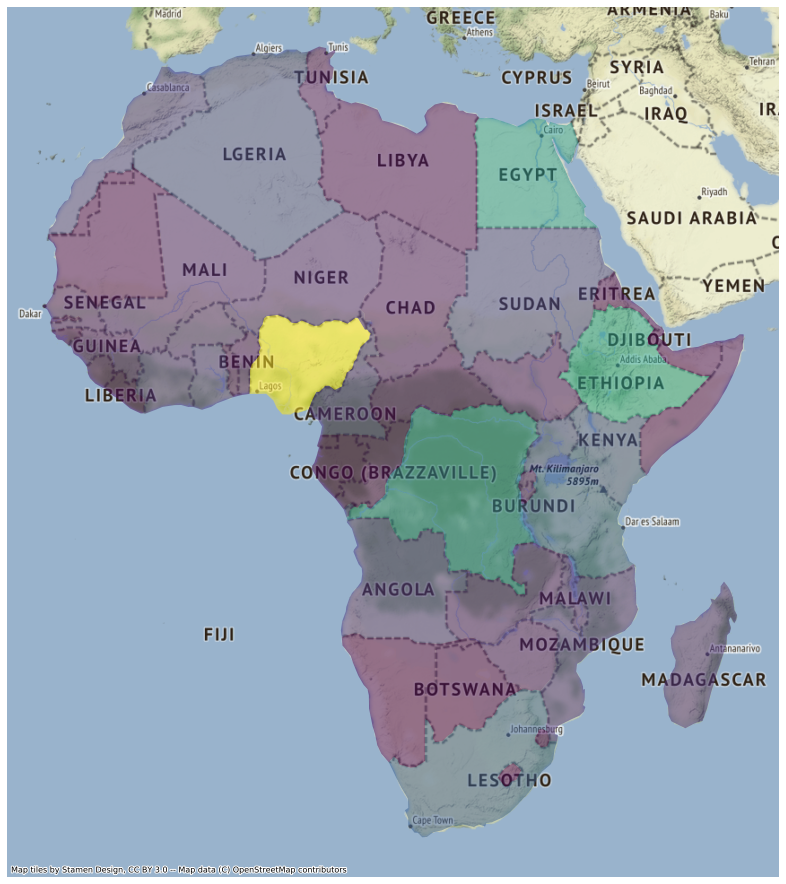

In [57]:
# convert CRS to epsg=3857 Web Mercator
africa_WM = africa.to_crs(epsg=3857)


f,ax = plt.subplots(1, figsize=(16,16))

# plot the africa data as usual 
africa_WM .plot( alpha=0.5,column='pop_est',ax=ax)

# add ctx basemap to ax
ctx.add_basemap(ax)

ax.set_axis_off()

#### Different base maps.
By default ctx.add_basemap() uses the Stamen Terrain style.

To see the available different base maps we can get the provider keys:

List of contextily providers:

In [58]:
ctx.providers.keys()

dict_keys(['OpenStreetMap', 'OpenSeaMap', 'OpenPtMap', 'OpenTopoMap', 'OpenRailwayMap', 'OpenFireMap', 'SafeCast', 'Thunderforest', 'OpenMapSurfer', 'Hydda', 'MapBox', 'Stamen', 'Esri', 'OpenWeatherMap', 'HERE', 'FreeMapSK', 'MtbMap', 'CartoDB', 'HikeBike', 'BasemapAT', 'nlmaps', 'NASAGIBS', 'NLS', 'JusticeMap', 'Wikimedia', 'GeoportailFrance', 'OneMapSG'])

Each will have their own options, accessed by the code: <code> ctx.providers.<text color='red'>provider_from_above</font>.keys()</code>

E.g. <code> ctx.providers.OpenStreetMap.keys()</code>

In [59]:
ctx.providers.OpenStreetMap.keys()

dict_keys(['Mapnik', 'DE', 'CH', 'France', 'HOT', 'BZH'])

We can then use the provider and porvider options to choose our base map e.g. <code>OpenStreetMap.Mapnik</code>

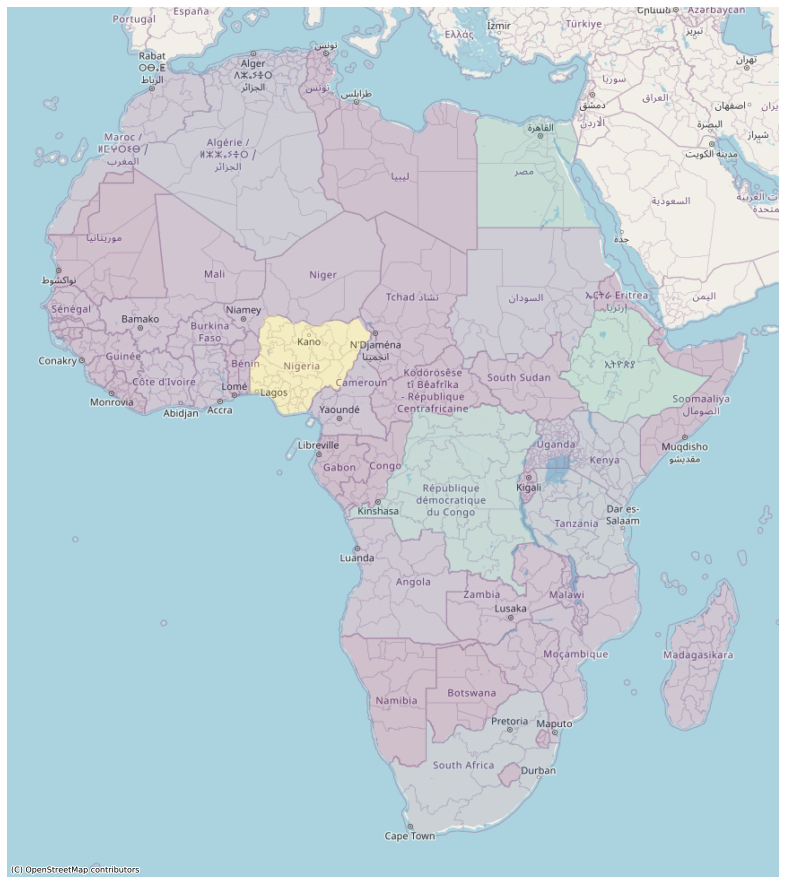

In [60]:
import contextily as ctx

f,ax = plt.subplots(1, figsize=(16,16))

# plot the africa data as usual 
africa_WM .plot(figsize=(10, 10), alpha=0.2,column='pop_est',ax=ax)

# add ctx basemap to ax, specifying the basemap provider and options
ctx.add_basemap(ax,url=ctx.providers.OpenStreetMap.Mapnik)

ax.set_axis_off()


<font color='orchid'><b>  Play around with the providers and options to get different base maps.

#### Using geoplot to add a basemap

We can also use the geoplot package to add base maps

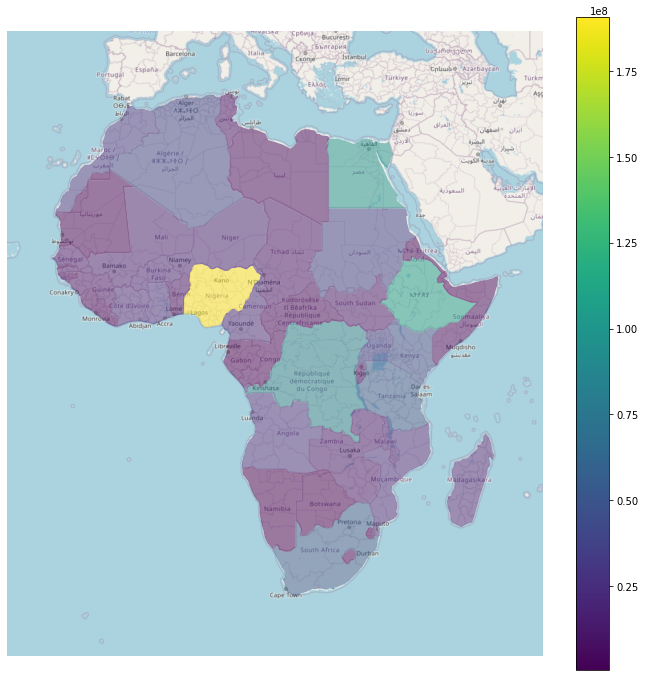

In [61]:
import geoplot.crs as gcrs

# specify basemap (webmap) including projection
# using geoplot we specify the figure size in the function
ax = gplt.webmap(africa, projection=gcrs.WebMercator(),figsize=(12, 12),)

# plot a chlorolpeth of africa by popualtion estiamte
gplt.choropleth(africa, ax=ax, hue='pop_est', legend=True, alpha=0.5);